In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

In [83]:
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5).T

,6562,5089,2677,1542,6211
customerID,3621-CEOVK,0277-BKSQP,2608-BHKFN,9798-OPFEM,4439-JMPMT
gender,Female,Male,Female,Female,Female
SeniorCitizen,1,0,0,0,0
Partner,Yes,Yes,No,No,Yes
Dependents,No,Yes,No,No,Yes
tenure,14,8,4,46,5
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,No,No,No
InternetService,Fiber optic,DSL,Fiber optic,No,Fiber optic
OnlineSecurity,No,No,No,No internet service,No


In [84]:
df.drop("customerID", axis="columns", inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [85]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [86]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [87]:
# pd.to_numeric(df.TotalCharges)

In [88]:
df.describe

<bound method NDFrame.describe of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [89]:
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [90]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [91]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [92]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [93]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [94]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


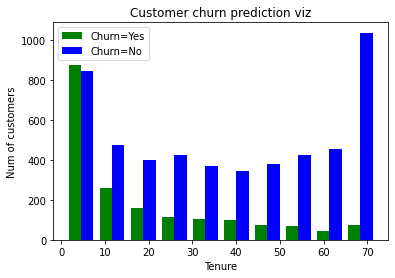

In [95]:
plt.xlabel("Tenure")
plt.ylabel("Num of customers")
plt.title("Customer churn prediction viz")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["green", "blue"], label=["Churn=Yes", "Churn=No"], )
plt.legend();

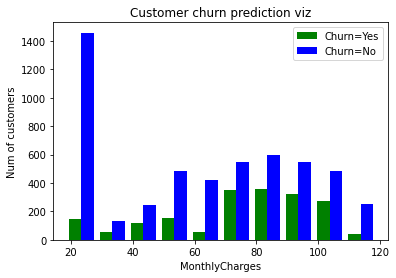

In [96]:
mc_churn_no = df[df.Churn=="No"].MonthlyCharges
mc_churn_yes = df[df.Churn=="Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Num of customers")
plt.title("Customer churn prediction viz")
plt.hist([mc_churn_yes, mc_churn_no], color=["green", "blue"], label=["Churn=Yes", "Churn=No"], )
plt.legend();

In [97]:
def print_unique_col_values(df):
    for column in df:
            if df[column].dtype == "object":
                print(f"{column} : {df1[column].unique()}")
                
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [98]:
df1.replace("No internet service", "No", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [99]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [100]:
df1.replace("No phone service", "No", inplace=True)
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [101]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({"Yes": 1, "No" : 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [102]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [103]:
for col in df1:
    print(f"{col} : {df1[col].unique()}")
    

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [104]:
df1.gender.replace({"Female": 1, "Male": 0}, inplace=True)
df1.gender.value_counts()

0    3549
1    3483
Name: gender, dtype: int64

In [105]:
df1.gender.unique()

array([1, 0])

In [106]:
df2 = pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])
df2.head().T

,0,1,2,3,4
gender,1.00,0.00,0.00,0.00,1.00
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
MultipleLines,0.00,0.00,0.00,0.00,0.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00
DeviceProtection,0.00,1.00,0.00,1.00,0.00


In [107]:
len(df2.columns), len(df1.columns)

(27, 20)

In [108]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [110]:
df2.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Partner,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.000000,0.464789,0.014085,0.619718,0.014085
PhoneService,0.000000,1.000000,1.000000,0.000000,1.000000
MultipleLines,0.000000,0.000000,0.000000,0.000000,0.000000
OnlineSecurity,0.000000,1.000000,1.000000,1.000000,0.000000
OnlineBackup,1.000000,0.000000,1.000000,0.000000,0.000000
DeviceProtection,0.000000,1.000000,0.000000,1.000000,0.000000


In [111]:
df2.tenure.max(), df2.tenure.min()

(1.0, 0.0)

In [112]:
df2.MonthlyCharges.max(), df2.MonthlyCharges.min()

(0.9999999999999999, 0.0)

In [113]:
df2.TotalCharges.max(), df2.TotalCharges.min()

(0.9999999999999999, 0.0)

In [114]:
X = df2.drop("Churn", axis="columns")
y = df2["Churn"]

In [115]:
X.shape, y.shape

((7032, 26), (7032,))

In [116]:
X.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Partner,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.000000,0.464789,0.014085,0.619718,0.014085
PhoneService,0.000000,1.000000,1.000000,0.000000,1.000000
MultipleLines,0.000000,0.000000,0.000000,0.000000,0.000000
OnlineSecurity,0.000000,1.000000,1.000000,1.000000,0.000000
OnlineBackup,1.000000,0.000000,1.000000,0.000000,0.000000
DeviceProtection,0.000000,1.000000,0.000000,1.000000,0.000000


In [117]:
y.T

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [119]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [120]:
len(X_train.columns)

26

In [121]:
import tensorflow as tf
from tensorflow import keras

In [43]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation="relu"),
#     keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 5s 3ms/step - loss: 0.5039 - accuracy: 0.7474
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8052
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4050 - accura

In [44]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7811


[0.46184608340263367, 0.7810945510864258]

In [45]:
yp = model.predict(X_test)
yp[:5]

array([[0.23695074],
       [0.5699313 ],
       [0.00700084],
       [0.8030691 ],
       [0.6207512 ]], dtype=float32)

In [46]:
y_preds = []
for element in yp:
    if element > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [47]:
y_preds[:10], y_test[:10]

([0, 1, 0, 1, 1, 1, 0, 0, 0, 0], 2660    0
 744     0
 5579    1
 64      1
 3287    1
 816     1
 2670    0
 5920    0
 1023    0
 6087    0
 Name: Churn, dtype: int64)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



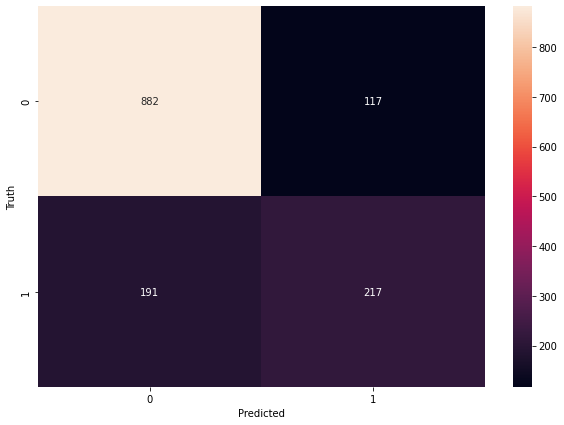

In [49]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

# 2

In [50]:
bank_df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
bank_df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [51]:
bank_df.drop(["RowNumber", "CustomerId", "Surname"],axis="columns", inplace=True)

In [52]:
bank_df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.1


In [53]:
bank_df.Gender.replace({"Female":0, "Male":1}, inplace=True)
bank_df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,0,0,0,0,0
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.1


In [54]:
for col in bank_df:
    print(f"{col}: {bank_df[col].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [55]:
pd.to_numeric(bank_df["Balance"])
bank_df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [56]:
bank_df.EstimatedSalary.dtypes

dtype('float64')

In [57]:
bank_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
col_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts"]

scaler2 = MinMaxScaler()

bank_df[col_to_scale] = scaler2.fit_transform(bank_df[col_to_scale])
bank_df.head().T

,0,1,2,3,4
CreditScore,0.538,0.516,0.304,0.698,1.0
Geography,France,Spain,France,France,Spain
Gender,0,0,0,0,0
Age,0.324324,0.310811,0.324324,0.283784,0.337838
Tenure,0.2,0.1,0.8,0.1,0.2
Balance,0.0,0.334031,0.636357,0.0,0.500246
NumOfProducts,0.0,0.0,0.666667,0.333333,0.0
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,0.506735,0.562709,0.569654,0.46912,0.3954


In [59]:
for col in bank_df:
    print(f"{col}: {bank_df[col].unique()}")

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [60]:
bank_df.Geography.dtypes

dtype('O')

In [61]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [62]:
bank_df_2 = pd.get_dummies(data=bank_df, columns=["Geography"])
bank_df_2.head().T

,0,1,2,3,4
CreditScore,0.538000,0.516000,0.304000,0.698000,1.000000
Gender,0.000000,0.000000,0.000000,0.000000,0.000000
Age,0.324324,0.310811,0.324324,0.283784,0.337838
Tenure,0.200000,0.100000,0.800000,0.100000,0.200000
Balance,0.000000,0.334031,0.636357,0.000000,0.500246
NumOfProducts,0.000000,0.000000,0.666667,0.333333,0.000000
HasCrCard,1.000000,0.000000,1.000000,0.000000,1.000000
IsActiveMember,1.000000,1.000000,0.000000,0.000000,1.000000
EstimatedSalary,0.506735,0.562709,0.569654,0.469120,0.395400
Exited,1.000000,0.000000,1.000000,0.000000,0.000000


In [63]:
bank_df_2.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [64]:
bank_df_2.shape

(10000, 13)

In [65]:
X = bank_df_2.drop("Exited", axis="columns")
y = bank_df_2["Exited"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [68]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5123 - accuracy: 0.7885
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4619 - accuracy: 0.7965
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.7965
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7965
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7993
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8046
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8110
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4217 - accura

In [69]:
y_preds = model.predict(X_test)

In [70]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8580


[0.3504860997200012, 0.8579999804496765]

In [71]:
y_preds

array([[0.03197435],
       [0.11096577],
       [0.08148231],
       ...,
       [0.07322221],
       [0.01488615],
       [0.00554477]], dtype=float32)

In [72]:
y_preds_2 = []
for element in y_preds:
    if element > 0.5:
        y_preds_2.append(1)
    else:
        y_preds_2.append(0)

In [73]:
print(classification_report(y_test, y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1591
           1       0.72      0.49      0.59       409

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



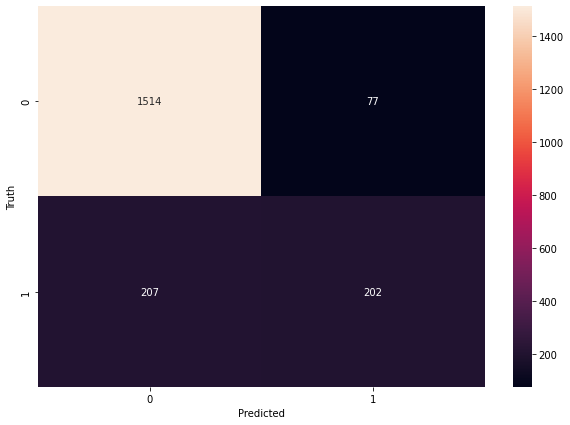

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_2)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [77]:
!pip install tensorflow-addons
import tensorflow as tf
from tensorflow_addons import losses
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.5 MB/s 


In [122]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [123]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5307 - accuracy: 0.7196
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.7995
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8055
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8078
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4057 - accura

## Method 1 : Undersampling

In [124]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [125]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [126]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [127]:
# Number of classes in training Data
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

In [128]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.6736
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7582
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7602
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7625
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7639
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7642
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7639
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7702
Epoch 11/

## Method 2 : Over-sampling

In [129]:
count_class_0, count_class_1

(5163, 1869)

In [131]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [132]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [133]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [134]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5362 - accuracy: 0.7301
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4930 - accuracy: 0.7594
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7632
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7640
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4764 - accuracy: 0.7683
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4742 - accuracy: 0.7712
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4708 - accuracy: 0.7719
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.7725
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7729
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4665 - accura

## Method 3 : SMOTE    (Synthetic Minority Over-Sampling Technique)

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [138]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [139]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [141]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [142]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5508 - accuracy: 0.7243
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4753 - accuracy: 0.7722
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4635 - accuracy: 0.7759
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.7800
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7858
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4473 - accuracy: 0.7850
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.7886
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.7961
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.7962
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4297 - accura

## Method 4 : Use of ensemble with under-sampling

In [143]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [144]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [146]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [147]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [148]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [149]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [150]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [151]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6281 - accuracy: 0.6813
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7729
Epoch 11/

In [152]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6005 - accuracy: 0.6983
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7756
Epoch 11/

In [153]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5623 - accuracy: 0.7374
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7624
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7677
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7723
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7715
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7712
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7814
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7787
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.7795
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7761
Epoch 11/

In [154]:
len(y_pred1)

1407

In [155]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [156]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407

